# Neural Networks From Scratch

_Credits_: activity adapted from:

- [Part 1 of notebook by Sondak et al](https://harvard-iacs.github.io/2019-CS109A/labs/lab11x/)
- [Tutorial by C. Hansen](https://mlfromscratch.com/neural-network-tutorial/#/). Made for and explained at [mlfromscratch.com/neural-networks-tutorial/](https://mlfromscratch.com/neural-network-tutorial/).


In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


## Learning Goals

By the end of this lab, you should:
- understand how a simple neural network works and code its functions from scratch.
- implement forward and backard pass for a network with multiple layers in Numpy.

## Part 1: Single neuron

The simplest way to describe a neural network is that we have some inputs $x$, which get combined into an auxilliary variable $a$. The auxilliary variable is passed through the activation function $\sigma\left(a\right)$ and the result is the output.
Inputs are linearly combined according to some weights $w$ and a bias $b$. This transformation is also sometimes called an **affine** transformation. The perceptron transforms the weighted inputs according to the rule of the activation function. For a single perceptron, the output $y$ is just the output from the perceptron. The linear transformation and activation of the neuron occurs within a single **layer** of the network (shown in the dotted box).
Let's see what the single-layer, single neuron network give us. We have a couple of choices to make:

1. We must choose some weights and some biases
2. We must choose an activation function

For now, we will manually specify the weights and biases.

We choose a _sigmoid_ activation function
$$\sigma\left(a\right) = \dfrac{1}{1 + e^{-a}}=\frac{e^a}{e^a+1}$$

What are the limits $\displaystyle\lim_{a\to\infty}\sigma\left(a\right)$ and $\displaystyle\lim_{a\to-\infty}\sigma\left(a\right)$?

_Note_: Actually, the sigmoid we have here is called the _logistic_ function. Sigmoids are really a family of functions and the logistic function is just one member in that family.


**TODO** Plot the sigmoid

Define a sigmoid function and plot it for an array of 500 points from -5 to 5


In [237]:
# TODO your code here
def sigmoid(x):
    return 1/(1 + np.exp(-x))


**TODO** Generate a list of 500 $x$ points from -5 to 5 (using `np.linspace`) and plot both the sigmoid and the tanh (for tanh you may use `np.tanh`)

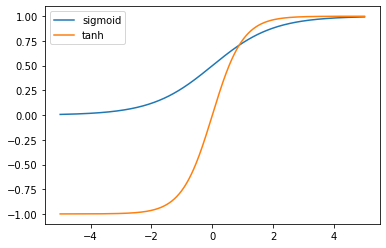

In [238]:
# TODO your code here
x = np.linspace(-5, 5, 500)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.legend()


Note the difference in **range** between both functions.


##### Comments

- We say that the activation occurs when $\sigma(a) = \dfrac{1}{2}$ (at $a=0$). When $a= wx+b$, we can show that this corresponds to $x = -\dfrac{b}{w}$.
- The "steepness" of the sigmoid is controlled by $w$.


### Our task: approximate a Gaussian function using a node

The task is to approximate (or learn) a function $f\left(x\right)$ given some input $x$. For demonstration purposes, the function we will try to learn is a Gaussian function
\begin{align}
f\left(x\right) = e^{-x^{2}}
\textrm{}
\end{align}

Even though we represent the input $x$ as a vector on the computer, you should think of it as a single input.


**TODO** Start by plotting the above function using the $x$ dataset you created earlier


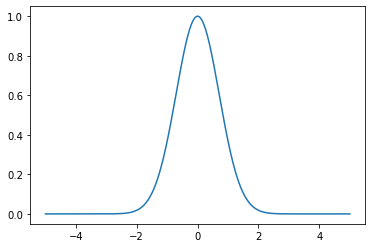

In [239]:
# TODO your code here
def gaussian(x):
    return np.exp(-x**2)

f = gaussian(x)
plt.plot(x, f)


Now, let's code the single node as per the image above.


**TODO** Write a function named `affine` that does the linear transformation.


In [240]:
# TODO your code here
def affine(x, w, b):
    """Return affine transformation of x

    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron

    RETURN
    ======
    a: A numpy array of points after the affine transformation
        a = wx + b
    """

    # TODO your code goes here
    a = w * x + b
    return a


Test your function with the following call:


In [241]:
# TODO your code here
w = -4.5
b = 4.0

z = sigmoid(affine(x, w, b))


And now we plot the activation function and the true function.


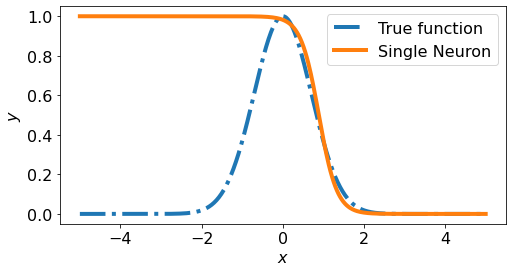

In [242]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # create axes object

SIZE = 16
# Plot
ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, z, lw=4, label=r'Single Neuron')

# Create labels (very important!)
# Notice we make the labels big enough to read
ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)  # Make the tick labels big enough to read

# Create a legend and make it big enough to read
ax.legend(fontsize=SIZE, loc=1)


The single perceptron simply turns the output on and off at some point, but that's about it. We see that the neuron is on until about $x=0$ at which point it abruptly turns off. It's able to get "close" to the true function. Otherwise, it has nothing in common with the true function.

What do you think will happen if you change $w$ and $b$? Try it out with the next cell of code. Here we have 3 sets of weights and biases to produce 3 sets of predicted curves. All of them apper in the folloing plot.


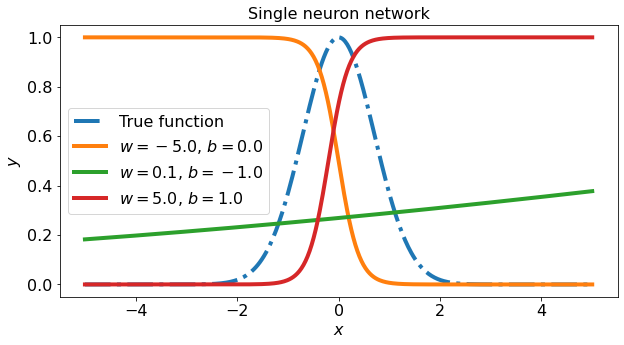

In [243]:
w = [-5.0, 0.1, 5.0]  # Create a list of weights
b = [0.0, -1.0, 1.0]  # Create a list of biases

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, f, lw=4, ls='-.', label='True function')
for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {0}$, $b = {1}$'.format(wi, bi))
ax.set_title('Single neuron network', fontsize=SIZE)

# Create labels (very important!)
# Notice we make the labels big enough to read
ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)  # Make the tick labels big enough to read

# Create a legend and make it big enough to read
ax.legend(fontsize=SIZE, loc='best')


We didn't do an exhaustive search of the weights and biases, but it sure looks like this single perceptron is never going to match the actual function. Again, we shouldn't be suprised about this. The output layer of the network is simply the logistic function, which can only have so much flexibility.

Let's try to make our network more flexible by using **more neurons**!


## Part 2: Multiple neurons

It appears that a single neuron is somewhat limited in what it can accomplish. What if we expand the number of nodes/neurons in our network? We have two obvious choices here. One option is to add depth to the network by putting layers next to each other. The other option is to stack neurons on top of each other in the same layer. Now the network has some width, but is still only one layer deep.


**Some observations**

1. We still have a single input in this case. Note that this is not necessary in general. We're just keeping things simple with a single input for now. If we have more inputs we will have a matrix for $X$.
2. Each node (or neuron) has a weight and bias associated with it. An affine transformation is performed for each node.
3. Both nodes use the same activation function form $\sigma\left(\cdot\right)$ on their respective inputs.
4. The outputs of the nodes must be combined to give the overall output of the network. There are a variety of ways of accomplishing this. In the current example, we just take a linear combination of the node outputs to produce the actual prediction. Notice that now we have weights and biases at the output too.
   Let's see what happens in this case. First, we just compute the outputs of each neuron.


In [244]:
x = np.linspace(-5.0, 5.0, 500)  # 500 input points
f = np.exp(-x*x)  # target data

w = np.array([3.5, -3.5])  # weight vector
b = 3.5  # bias term

# Affine transformations
a1 = w[0] * x + b
a2 = w[1] * x + b

# Node outputs
z1 = 1.0 / (1.0 + np.exp(-a1))
z2 = 1.0 / (1.0 + np.exp(-a2))


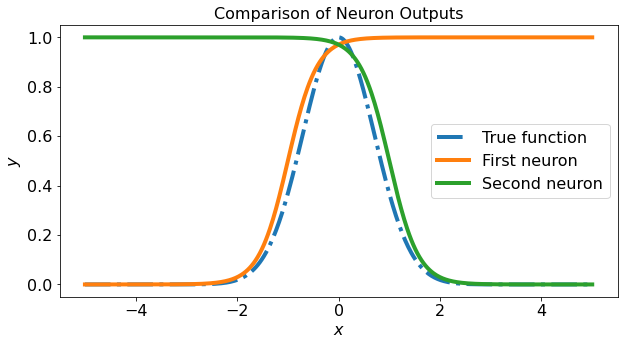

In [245]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(x, f, lw=4, ls='-.', label='True function')
ax.plot(x, z1, lw=4, label='First neuron')
ax.plot(x, z2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
# Notice we make the labels big enough to read
ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)  # Make the tick labels big enough to read

# Create a legend and make it big enough to read
ax.legend(fontsize=SIZE, loc='best')


Just as we expected, we obtain one sigmoid for each neuron.


### Adding another layer

Of course, to get the network prediction we must combine these two sigmoid curves somehow. We can apply again an afine transformation to $z_{1}$ and $z_{2}$:

$$ y_{out} = \vec{w}_{out} \cdot [z_1 \quad z_2] + b_{out} $$

**Note**: 
We are **not** doing classification here, but regression. We are trying to predict a real-valued function. This is why the output neuron will not have sigmoid activation. The sigmoid activation is convenient when doing classification because you need outputs to range between $0$ and $1$. However, when learning a real-valued function, we don't have as good of a reason to choose a sigmoid.


In [246]:
# output neuron weights and bias
wout = np.array([1.2, 1.2])
bout = -1.2

# computing the affine transformation with two inputs
yout = wout @ np.array([z1, z2]) + bout


And plot to check your result.


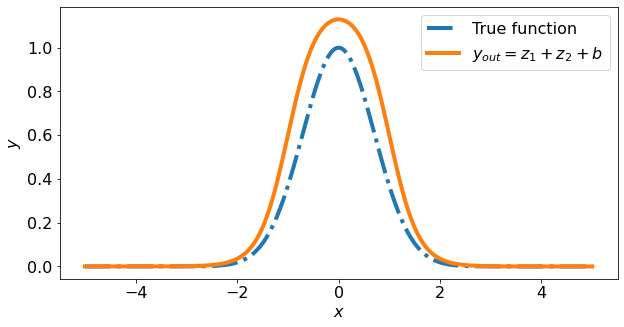

In [247]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = z_{1} + z_{2} + b$')

# Create labels (very important!)
# Notice we make the labels big enough to read
ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)  # Make the tick labels big enough to read

# Create a legend and make it big enough to read
ax.legend(fontsize=SIZE, loc='best')


Very cool! The two nodes interact with each other to produce a pretty complicated-looking function. It still doesn't match the true function, but now we have some hope. In fact, it's starting to look a little bit like a Gaussian!


### Adding some learning capabilities

We know that changing the weights and biases can get us a better approximation. Instead of trying to fix these values by hand, let us launch an iterative **learning procedure** using the **perceptron learning rule**. For a certain sample $x_n$ the incurring update is:
$$ \Delta_n \vec{w} = -\rho (\hat{y}_{n} - y_n) x_n$$
$$ \Delta_n b = -\rho (\hat{y}_{n} - y_n)$$
Summing the updates for all samples we get:
$$ \Delta \vec{w} = -\rho \vec{\varepsilon} \cdot \vec{x} = -\rho \sum_{n=1}^{500} \varepsilon_n x_n$$
$$ \Delta b = -\rho \sum_{n=1}^{500} \varepsilon_n$$
where $\varepsilon_n = \hat{y}_{n} - y_n$ and $\vec{\varepsilon} = \vec{\hat{y}} - \vec{y}$


The following code applies these update rules in a loop. Launch the code and see after how many iterations we can achieve a mean-squared-error (MSE) lower than `1e-4`

**TODO** Complete the code bellow to include the perceptron updates. In the code, our $\vec{\hat{y}}$ is given by `yout`. The target variable $\vec{y}$ is given by `f`. The error term $\vec\varepsilon$ is kept in the variable `error`


In [248]:
# initializing output neuron parameters
wout = np.array([1.2, 1.2])
bout = -1.2

# learning hyperparameters
learning_rate = 1e-3
max_iter = int(1e4)

# intializing loop variables
error = 1
i = 0
learning_curve = []
# learning loop
# while not converged:
while np.mean(error**2) > 1e-4 and i < max_iter:
    # compute output
    yout = wout[0] * z1 + wout[1] * z2 + bout
    # compte error and save it in list to visualize leraning curve later
    # TODO your code here
    error = (yout-f)
    learning_curve.append(np.mean(error**2))
    # apply the perceptron learning rule to weights and bias
    # TODO your code here
    wout[0] -= learning_rate * error @ z1
    wout[1] -= learning_rate * error @ z2
    bout -= learning_rate * error
    # increment iteration counter
    i += 1
print(f"Learning stopped with MSE={learning_curve[-1]} after {i} iterations")


Learning stopped with MSE=9.995645890463694e-05 after 2021 iterations


Plot again the function graphs so you can see how the new predicted curve is a much better fit.


**Note**: the graph to the right shows the evolution of the mean-squared error across iterations and it is called a **learning curve** (same as when doing SGD).


Text(0.5, 1.0, 'Learning curve')

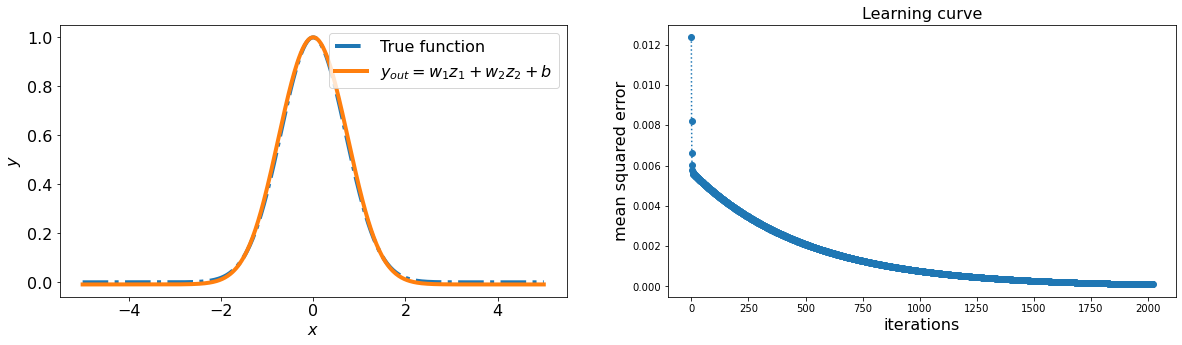

In [249]:

# compute output again prior to plotting
yout = wout @ np.array([z1, z2]) + bout

fig, (ax, lc) = plt.subplots(1, 2, figsize=(20, 5))

ax.plot(x, f, lw=4, ls='-.', label='True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = w_{1}z_{1} + w_{2}z_{2} + b$')

# Create labels (very important!)
# Notice we make the labels big enough to read
ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)  # Make the tick labels big enough to read

# Create a legend and make it big enough to read
ax.legend(fontsize=SIZE, loc=1)

lc.plot(np.arange(len(learning_curve)), learning_curve, 'o:')
lc.set_xlabel("iterations", fontsize=SIZE)
lc.set_ylabel("mean squared error", fontsize=SIZE)
lc.set_title('Learning curve', fontsize=SIZE)


## Part 3: Multi-layer perceptron from scratch

In this section, you will be implementing a full multi-layer perceptron in Numpy. You will need to code all the vectorized equations by yourself, both forward and backward.
In the following assignments (TP3 and on), we will be working with Tensorflow and Keras, which do much of this work for you.

We will focus on the following 4-layer neural network, with fully connected layers in this notebook.

<img alt="NN diagram with 784 inputs, followed by 3 layers with 128, 64 and 10 nodes, respectively" src="https://mlfromscratch.com/content/images/2020/02/deep_nn-1.png" width="500"></img>


Here some extra imports necessary for this part:

In [199]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import time
from collections import defaultdict

from numpy.typing import ArrayLike
from typing import List, Dict, Tuple 

try:
    import tqdm
except ModuleNotFoundError:
    !pip install tqdm
from tqdm.notebook import tqdm


### Choosing a Dataset

For this walkthrough, we will focus on importing the MNIST dataset and using that as the input to our deep neural networks. Note that this is purely a demonstration of how to make a neural network from scratch, and it is NOT the recommended architecture for solving the MNIST problem.


First we download the data from OpenML:

In [17]:
data_bunch = fetch_openml('mnist_784', as_frame=False)

Image pixels have values from 0 to 255. We will divide all of them by this value so the range of variation stays between 0 and 1, so features have a similar scale (remember this favours SGD convergence)

In [147]:
X = (data_bunch.data/255).astype('float32')
y = data_bunch.target.astype('uint32')

Then we split data in training and validation

In [148]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42)

### Encoding targets
Our targets `y` have integer values at this point. When training our classifier network, we need to compare the 10 predicted class probabilities to the ground thruth. For that, we will encode out targets `y` using one-hot encoding.

In [149]:
def one_hot(a):
    num_classes = np.max(a) + 1
    return np.eye(num_classes, dtype="uint32")[a.reshape(-1)]

# small y represents the target wiht class ids
# capital Y stores the one-hot representation
Y_train = one_hot(y_train)
Y_val = one_hot(y_val)


### Equations from theory
#### Forward pass
From the theory we know we need to implement the following forward equations:
$$ \vec{a}_1 := W_1\vec{x} + \vec{b}_1$$
$$ \vec{z}_1 := \sigma(\vec{a}_1)$$
$$ \vec{a}_2 := W_2\vec{z}_1 + \vec{b}_2$$
$$ \vec{z}_2 := \sigma(\vec{a}_2)$$
$$ \vec{a}_3 := W_3\vec{z}_2 + \vec{b}_3$$
$$ \vec{\hat{y}} := \vec{z}_3 = \mathcal{S}(\vec{a}_3)$$

Here $\mathcal{S}:\mathbb{R}^n \to \mathbb{R}^n $ is the softmax function.
#### Backward pass
For the backward equations, we have for $l$ in $\{3,2,1\}$ and initializing $ \vec{g}_3 = \frac{\partial J}{\partial \vec{\hat{y}}} $:
$$ \vec{g}_{l} := \vec{g}_l \odot \varphi_l\prime(\vec{a}_l)$$
$$ \Delta W_l := \vec{g}_l \otimes \vec{z}_{l-1} $$
$$ \Delta \vec{b}_l := \vec{g}_l  $$
$$ \vec{g}_{l-1} := W_l^T \vec{g}_l $$
Here $\otimes$ is the outter product between two vectors ($\vec{x} \otimes \vec{y} = \vec{x}\vec{y}^T$), and $\odot$ is the element-wise product.

Using the cross entropy loss, our gradient with respect to the last layer will be proportional to the prediction error:
$$\vec{g}_3 := \frac{\partial J}{\partial \vec{\hat{y}}} =\vec{\hat{y}}-\vec{y}$$

Expanding the equations for all layers in our network we have the following:
$$\vec{g}_3 := (\vec{\hat{y}}-\vec{y})\odot \mathcal{S}\prime(\vec{a}_3) $$
$$ \Delta W_3 := \vec{g}_3 \otimes \vec{z}_2 $$
$$ \Delta \vec{b}_3 := \vec{g}_3 $$
$$ \vec{g}_2 := (W_3^T \vec{g}_3) \odot \sigma\prime(\vec{a}_2)$$
$$ \Delta W_2 := \vec{g}_2 \otimes \vec{z}_1 $$
$$ \Delta \vec{b}_2 := \vec{g}_2 $$
$$ \vec{g}_1 := (W_2^T \vec{g}_2) \odot \sigma\prime(\vec{a}_1)$$
$$ \Delta W_1 := \vec{g}_1 \otimes \vec{x} $$
$$ \Delta \vec{b}_1 := \vec{g}_1 \odot \sigma\prime(\vec{a}_1) $$


### Implementation with NumPy

You will complete the following code with the pertinent equations. For now, the code does not include biases for the neurons, only weight matrices

1. **Initialization** Complete the method `initialization` with the shapes for each of the network weight matrices.
1. **Forward pass** Complete the method `forward_pass` with the expressions computing the forward equations. The method should return the final predicted `output` $\vec{\hat{y}}$.
1. **Backward pass** Complete the method `backward_pass` with the expressions to compute the backward equations, that is, the weight updates. You may use [`numpy`'s `np.outer`](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) to compute outer products.
1. **Update parameters** Complete the method `update_network_parameters` so that the updates computed during the forward pass are applied to the parameters.

Once you are done with these steps, your model will be functional, and you will be able to fit it to the training data.

There are further additions you can do, which are the subject of the exercises comming after the code.


#### Activation functions

In [221]:
# Activation functions to be used in the network
# define the sigmoind function and its derivative
def sigmoid(x, derivative=False):
    if derivative:
        return (np.exp(-x))/((np.exp(-x)+1)**2)
    return 1/(1 + np.exp(-x))

# define the softmax function and its derivative
def softmax(x, derivative=False):
    # Numerically stable with large exponentials
    exps = np.exp(x - x.max())
    if derivative:
        return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
    return exps / np.sum(exps, axis=0)

# define the relu activaiton and its derivative
def relu(x, derivative=False):
    # TODO EXERCISE 1
    if derivative:
        return np.where(x >= 0, 1, 0)
    return np.where(x >= 0, x, 0)

#### Neural network class

In [222]:
class DeepNeuralNetwork():
    """
    This class implments a neural network with 4 layers 
    (one input layer + 2 hidden layers + one output layer).
    # TODO EXTRA Exercise 3 change the code so it supports an arbitrary number of layers
    """
    def __init__(self, n_neurons:list):
        """AI is creating summary for __init__
            The class constructor has only one argument, that determines the 
            size of each layer.
            It initializes network parameters according to these sizes
        Args:
            n_neurons (list): a list of integers containing the quantity of 
            neurons in each layer. The lenght of the list corresponds to the number of layers (including the input layer).
        """        
        self.n_neurons = n_neurons

        # we save all parameters in the neural network in this dictionary
        self.params = self._initialization()

    def _initialization(self) -> Dict:
        """Initializes parameters for the network and gathers them 
        in a dictionnary. This method is called in the class constructor.

        Weights for layer i are named Wi 
        biasfor layer i are named bi

        Returns:
            dict: dictionnary of parameters in the network. Weights for layer i
            are named Wi (W1, W2, etc). Bias for layer i is named bi (b1, b2, 
            etc)
        """
        # number of nodes in each layer
        input_layer = self.n_neurons[0]
        hidden_1 = self.n_neurons[1]
        hidden_2 = self.n_neurons[2]
        output_layer = self.n_neurons[3]

        # TODO complete with the shape of each weight matrix
        W1_shape = (hidden_1, input_layer)  # TODO code here
        W2_shape = (hidden_2, hidden_1)  # TODO code here
        W3_shape = (output_layer, hidden_2)  # TODO code here

        params = {
            # intialize weights with small random values
            'W1': np.random.randn(*W1_shape) * np.sqrt(1. / W1_shape[0]),
            'W2': np.random.randn(*W2_shape) * np.sqrt(1. / W2_shape[0]),
            'W3': np.random.randn(*W3_shape) * np.sqrt(1. / W3_shape[0]),
            # TODO EXTRA EXERCISE 2 add network bias here
            'b1': np.zeros(hidden_1, dtype=np.float32),
            'b2': np.zeros(hidden_2, dtype=np.float32),
            'b3': np.zeros(output_layer, dtype=np.float32)
        }

        return params

    def forward_pass(self, x) -> ArrayLike:
        """
        This functions computes the forward pass for a single sample x
        """
        params = self.params

        # input layer activations becomes sample
        params['Z0'] = x  # TODO code here

        # input layer to hidden layer 1
        params['A1'] = params['W1'] @ params['Z0'] + \
            params['b1']  # TODO code here
        params['Z1'] = sigmoid(params['A1'])  # TODO code here

        # hidden layer 1 to hidden layer 2
        params['A2'] = params['W2'] @ params['Z1'] + \
            params['b2']  # TODO code here
        params['Z2'] = sigmoid(params['A2'])  # TODO code here

        # hidden layer 2 to output layer
        params['A3'] = params['W3'] @ params['Z2'] + \
            params['b3']  # TODO code here
        params['Z3'] = softmax(params['A3'])  # TODO code here

        output = params['Z3']  # TODO code here
        return output

    def backward_pass(self, y, output) -> Dict:
        '''
        This is the backpropagation algorithm, for calculating the updates
        of the neural network's parameters.

        Note: There is a stability issue that causes warnings. This is 
                caused  by the dot and multiply operations on the huge arrays.

                RuntimeWarning: invalid value encountered in true_divide
                RuntimeWarning: overflow encountered in exp
                RuntimeWarning: overflow encountered in square
        '''
        params = self.params
        change_w = {}

        # Calculate W3 update
        grad = (output - y)  # TODO code here
        grad = grad * softmax(params['A3'], derivative=True)
        change_w['W3'] = np.outer(grad,  params['Z2'])  # TODO code here
        # TODO EXTRA EXERCISE 2 compute bias updates
        change_w['b3'] = grad

        # Calculate W2 update
        grad = (params['W3'].T @ grad)  # TODO code here
        grad = grad * sigmoid(params['A2'], derivative=True)
        change_w['W2'] = np.outer(grad, params['Z1'])  # TODO code here
        # TODO EXTRA EXERCISE 2 compute bias updates
        change_w['b2'] = grad

        # Calculate W1 update
        grad = params['W2'].T @ grad  # TODO code here
        grad = grad * sigmoid(params['A1'], derivative=True)
        change_w['W1'] = np.outer(grad,  params['Z0'])  # TODO code here
        # TODO EXTRA EXERCISE 2 compute bias updates
        change_w['b1'] = grad

        return change_w

    def update_network_parameters(self, changes_to_w, l_rate):
        '''
        Update network parameters according to update rule from
        Stochastic Gradient Descent.

        θ = θ - η * ∇J(x, y), 
            theta θ:            a network parameter (e.g. a weight w)
            eta η:              the learning rate
            gradient ∇J(x, y):  the gradient of the cost function,
                                i.e. the change for a specific theta θ
        '''
        for key, value in changes_to_w.items():
            # TODO code here
            self.params[key] -= l_rate * value

    def predict_proba(self, X):
        """
        This function computes predictions for a maxtrix of samples X
        by calling the forward_pass on each row. 
        Returns a class distribution vector per sample
        """
        # computes preductions by calling the forward pass on all samples
        return np.array([self.forward_pass(x_i) for x_i in X])

    def predict(self, X):
        """
        This function computes predictions for a maxtrix of samples X
        by calling the forward_pass on each row
        Returns a class id per sample
        """
        # computes preductions by calling the forward pass on all samples
        return np.array([np.argmax(self.forward_pass(x_i)) for x_i in X],
                        dtype='uint32')

    def score(self, X, y):
        '''
        This function computes predictions for a maxtrix of samples X,
        then checks if the index of the maximum value 
        in the output equals the index in the label y.
        This indicator vector of correct/incorrect predictions is 
        averaged to obtain the accuracy

        y may be a 1d array of labels or a one-hot encoded matrix of label indicators
        '''
        # computes the accuracy score by calling predict on all samples
        if y.ndim == 1:
            y_true = y
        elif y.ndim == 2:
            y_true = np.argmax(y, axis=1)

        return np.mean(y_true == self.predict(X))

    def fit(self, X_train:ArrayLike, Y_train:ArrayLike,
            X_val:ArrayLike, Y_val:ArrayLike,
            epochs=10, batch_size=16, l_rate=0.001) -> Dict:
        """This function fits the model parameters to the training data, 
        while monitoring the accuracy score on the validation data.

        Y arrays should be one-hot encoded

        Args:
            X_train (ArrayLike): Array with training input samples
            Y_train (ArrayLike): One-hot encoded array of training set targets
            X_val (ArrayLike): Array with validation samples
            Y_val (ArrayLike): One-hot encoded array of validation set targets
            epochs (int, optional): number of epochs for SGD. Defaults to 10.
            l_rate (float, optional): learning rate for SGD. Defaults to 0.001.

        Returns:
            Dict: dict containing the history of accuracy and loss metrics 
            across training epochs
        """
        history = defaultdict(list)
        for iteration in range(epochs):
            start_time = time.time()
            # split sample indexes in batches
            batch_indexes = np.array_split(np.arange(X_train.shape[0]), batch_size) 
            # Loop over batches of trainng samples
            # tqdm allows us to show a progress bar
            for batch_i, idx in tqdm(enumerate(batch_indexes), 
                                    desc=f"epoch {iteration+1} progress", 
                                    total=len(batch_indexes)):
                # this dictionnary will store the updates computed 
                # over all samples in the batch
                # values get updated after each sample is processed
                batch_changes = defaultdict(int)
                # loop over batch samples
                for x, y in zip(X_train[idx], Y_train[idx]):
                    # compute forward pass, backward pass, 
                    output = self.forward_pass(x)
                    changes_to_w = self.backward_pass(y, output)
                    # sum updates in batch_changes dictionary
                    for key, value in changes_to_w.items():
                         batch_changes[key] += value/batch_size

                # apply batched GD updates
                self.update_network_parameters(batch_changes, l_rate)

            # store performances on train and validation 
            # for learning curves later
            for split, X, Y in zip(['train', 'val'],
                                [X_train, X_val],
                                [Y_train, Y_val]):
                y_pred_proba = self.predict_proba(X)
                y_pred = np.argmax(y_pred_proba, axis=1)
                loss = log_loss(Y, y_pred_proba)
                y_true = np.argmax(Y, axis=1)
                accuracy = accuracy_score(y_true, y_pred)

                history[split+'_loss'].append(loss)
                history[split+'_accuracy'].append(accuracy)
            # Print stats about this epoch
            acc = history['val_accuracy'][-1]
            print(
                f'Epoch: {iteration + 1}, Time Spent: {time.time() - start_time:.2f}s, Val Accuracy: { acc * 100:.2f}%')

        return history


### Testing your implementation
#### Creating a network

**Note**: depending on the random initialization of the weights, you may get different results each time you initialize and fit a model. If you want to have a reproducible experiment, try setting a seed for numpy by `np.random.seed(42)` (or any other number), **prior to initializing your model**. Then you should get the same results each time.


In [223]:
# TODO set a seed for reproducibility
np.random.seed(42)
dnn = DeepNeuralNetwork(n_neurons=[784, 128, 64, 10])


#### Some basic tests prior to training
Let's verify that the base functions return appropriate arrays.

In [224]:
# testing the forward pass
output = dnn.forward_pass(X_train[1])
assert output.shape == Y_train[1].shape

In [225]:
# testing the backward pass
updates = dnn.backward_pass(Y_train[1], output)
for key, value in updates.items():
    if not np.isscalar(value):
        assert value.shape == dnn.params[key].shape, f"param {key} shape: {dnn.params[key].shape} != Update shape: {value.shape} "
    else:
        assert  np.isscalar(dnn.params[key]), f"param {key} has shape {dnn.params[key].shape} but update is scalar={value} "


Let's see how long it takes to predict outputs for the entire training set:

In [226]:
%timeit -n1 -r1 dnn.predict(X_train)

3.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


That is quite a while! Let's now see how our network is perfoming so far:


In [227]:
pred_proba = dnn.predict_proba(X_train)
y_pred = np.argmax(pred_proba, axis=1)

In [228]:
print(
    f"Training accuracy: {accuracy_score(y_train, y_pred):.2f}%, training loss:{log_loss(Y_train, pred_proba):.5f}")

Training accuracy: 0.10%, training loss:2.79628


Not a great begining, but that should improve with training.

#### Training the network
While testing your code, you may train on a small subset of the training set, so each iteration runs faster. Once your code is finished, you may train the model on the full dataset, and for a larger number of epochs.

In [219]:
history = dnn.fit(X_train[:10000,:], Y_train[:10000], X_val, Y_val,
                  epochs=5, batch_size=16, l_rate=1e-2)

epoch 1 progress:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch: 1, Time Spent: 5.42s, Val Accuracy: 10.46%


epoch 2 progress:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch: 2, Time Spent: 5.41s, Val Accuracy: 20.36%


epoch 3 progress:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch: 3, Time Spent: 5.71s, Val Accuracy: 29.30%


epoch 4 progress:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch: 4, Time Spent: 5.71s, Val Accuracy: 35.83%


epoch 5 progress:   0%|          | 0/16 [00:00<?, ?it/s]

Epoch: 5, Time Spent: 5.67s, Val Accuracy: 40.65%


### Plotting the learning curves

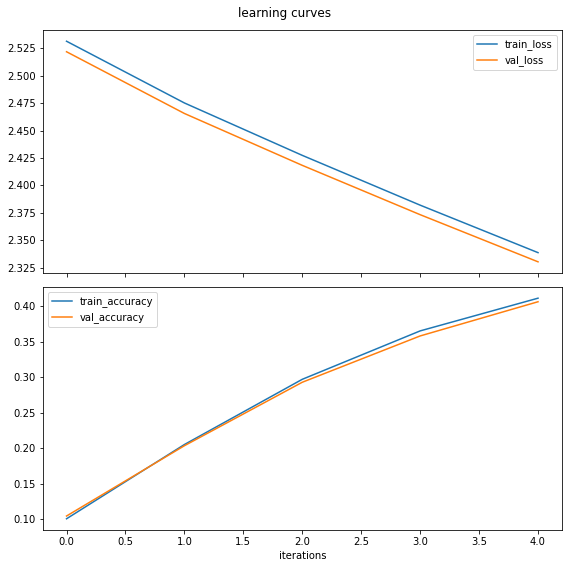

In [229]:
l_curves = pd.DataFrame(history)
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(8,8))
fig.suptitle("learning curves")
l_curves.filter(regex='loss').plot(ax=ax1)
l_curves.filter(regex='accuracy').plot(ax=ax2)
ax2.set_xlabel('iterations')
fig.tight_layout()

### Extra Exercises

These exercises could improve the network's performance and/or SW quality of this impelementation. It's good to try and solve them to get better knowledge of how neural networks work and what efficient implementations look like.

1. **Easy**: Implement the ReLU activation function. Check how the sigmoid functions are implemented for reference, and remember to implement the derivative as well. Use the ReLU activation function in place of the sigmoid function.

2. **Easy**: Initialize biases and add them to Z before the activation function in the forward pass, and update the biases in the backward pass.

3. **Medium**: Change the class implementation so that it supports an arbitrary number of layers via the `sizes=[]` argument.
   - Optimize the initialization function that makes weights for the neural network, such that you can modify the `sizes=[]` argument without the neural network failing.
   - Optimize the forward and backward pass, such that they run in a for-loop in each function. This makes the code easier to modify and possibly easier to maintain.
